In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import os

data_path='D:\\facemasks\\dataset\\'
categories = os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))

label_dict

{'without_mask': 0, 'with_mask': 1}

In [6]:
import cv2

In [7]:
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names= os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(100,100))
            data.append(resized)
            target.append(label_dict[category])
        
        except Exception as e:
            print('Exception:',e)

In [8]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],100,100,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [9]:
np.save('data',data)
np.save('target',new_target)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=data.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [16]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_target,
  epochs=15,
  callbacks=[checkpoint],
  validation_split=0.2)


Epoch 1/15
31/31 [==============================] - ETA: 0s - loss: 0.6878 - acc: 0.5293WARNING:tensorflow:From C:\Users\tanishq\anaconda3\envs\ann\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:1813: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
31/31 [==============================] - 19s 607ms/step - loss: 0.6878 - acc: 0.5293 - val_loss: 0.6729 - val_acc: 0.5605
Epoch 2/15
31/31 [==============================] - 18s 580ms/step - loss: 0.6589 - acc: 0.6404 - val_loss: 0.6133 - val_acc: 0.7379
Epoch 3/15
31/31 [==============================] - 18s 568ms/step - loss: 0.6022 - acc: 0.6949 - val_loss: 0.5279 - val_acc: 0.7702
Epoch 4/15
31/31 [==============================] - 18s 567ms/step - loss: 0.5431 - acc: 0.738

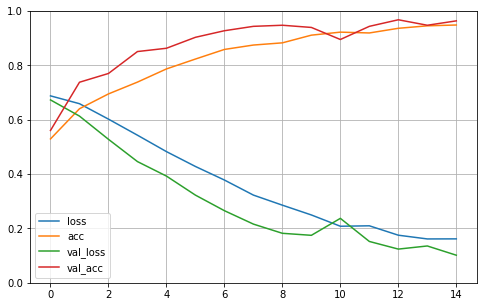

<Figure size 576x432 with 0 Axes>

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


figure = plt.gcf() 
figure.set_size_inches(8, 6) 
#plt.savefig('filename.png', bbox_inches='tight')
plt.savefig('loss_accuracy_graph.png',dpi=300, bbox_inches='tight')

In [18]:
model.save("model_v4.h5")

In [19]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 88ms/step - loss: 0.0926 - acc: 0.9710
[0.09255947172641754, 0.9710144996643066]


In [23]:
new=test_data[3:15]

In [24]:
y_pred = model.predict_classes(new)

print(y_pred)
print(label_dict)

[[1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]
{'without_mask': 0, 'with_mask': 1}


AxesImage(54,36;334.8x217.44)


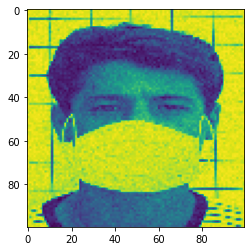

In [32]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


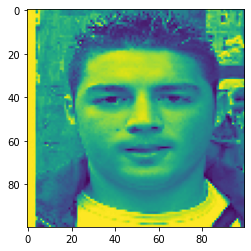

In [33]:
print(plt.imshow(test_data[7].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


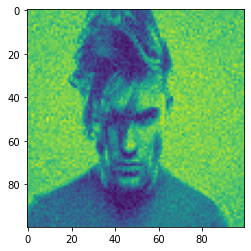

In [34]:
print(plt.imshow(test_data[11].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


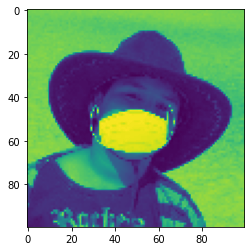

In [29]:
print(plt.imshow(test_data[12].reshape(100,100)))